In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [8]:
encoder = OneHotEncoder()
df['Transmission'] = encoder.fit_transform(df[['Transmission']]).toarray()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0.0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0.0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0.0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0.0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0.0,0


In [10]:
df['Transmission'].value_counts()

Transmission
0.0    261
1.0     40
Name: count, dtype: int64

In [11]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [12]:
df['Seller_Type'] = encoder.fit_transform(df[['Seller_Type']]).toarray()

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,1.0,0.0,0
1,sx4,2013,4.75,9.54,43000,Diesel,1.0,0.0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,1.0,0.0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,1.0,0.0,0
4,swift,2014,4.60,6.87,42450,Diesel,1.0,0.0,0


In [14]:
df['Seller_Type'].value_counts()

Seller_Type
1.0    195
0.0    106
Name: count, dtype: int64

In [15]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [16]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1.0,0.0,0
1,sx4,2013,4.75,9.54,43000,1,1.0,0.0,0
2,ciaz,2017,7.25,9.85,6900,0,1.0,0.0,0
3,wagon r,2011,2.85,4.15,5200,0,1.0,0.0,0
4,swift,2014,4.60,6.87,42450,1,1.0,0.0,0


In [18]:
df['Fuel_Type'].value_counts()

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64

In [19]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,1.0,0.0,0
1,2013,9.54,43000,1,1.0,0.0,0
2,2017,9.85,6900,0,1.0,0.0,0
3,2011,4.15,5200,0,1.0,0.0,0
4,2014,6.87,42450,1,1.0,0.0,0


In [20]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [22]:
linear_reg = LinearRegression()

In [23]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [24]:
Predicted_values = linear_reg.predict(X_test)


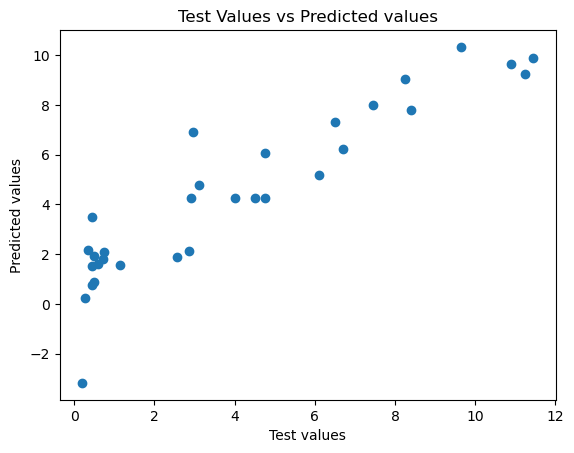

In [25]:
plt.scatter(Y_test,Predicted_values)
plt.title("Test Values vs Predicted values")
plt.xlabel("Test values")
plt.ylabel("Predicted values")
plt.show()

In [40]:
error = metrics.r2_score(Predicted_values,Y_test)

In [41]:
print(f'Error : {error}')

Error : 0.8062199941175402


In [28]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1.0,0.0,0
1,sx4,2013,4.75,9.54,43000,1,1.0,0.0,0
2,ciaz,2017,7.25,9.85,6900,0,1.0,0.0,0
3,wagon r,2011,2.85,4.15,5200,0,1.0,0.0,0
4,swift,2014,4.60,6.87,42450,1,1.0,0.0,0


In [29]:
new_data = pd.DataFrame({'Year':[2017,2018],'Present_Price':[8.00,7.65],'Kms_Driven':[6000,7800],'Fuel_Type':[0,0],'Seller_Type':[1.0,0.0],'Transmission':[0.0,0.0],'Owner':[0,0]})

In [30]:
new_data

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2017,8.00,6000,0,1.0,0.0,0
1,2018,7.65,7800,0,0.0,0.0,0


In [31]:
car_price1 = linear_reg.predict(new_data.loc[[0]])

In [32]:
print(f'2017 Model car price Predicted by this model : {car_price1[0]}')

2017 Model car price Predicted by this model : 6.265979516226366


In [33]:
car_price = linear_reg.predict(new_data.loc[[1]])

In [34]:
print(f'2018 Model car price Predicted by this model : {car_price[0]}')

2018 Model car price Predicted by this model : 5.505558143590406
